### Overview  

This notebook analyzes several tech stock. The following analyses are included:
1. Stock price/volume change over time
2. Moving average of the stock
3. Daily return 
4. Correlations between stocks
5. Risk analysis of the stocks
5. Stock price prediction

In [1]:
import numpy as np
import pandas as pd
from pandas import Series
import pandas_datareader.data as web
from __future__ import division
from datetime import datetime

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

#### Get stock data from Yahoo Financial

In [2]:
# interested in the stock price during the past 3 years
start = datetime.strptime('7/1/2013', '%m/%d/%Y')
end = datetime.strptime('7/1/2016', '%m/%d/%Y')

In [3]:
# apple stock
apple = web.DataReader("AAPL", 'yahoo', start, end)
apple.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2013-07-01,402.689991,412.269997,401.219997,409.219994,97763400,54.967257
2013-07-02,409.960011,421.629997,409.470013,418.490005,117466300,56.212424
2013-07-03,420.859993,422.979988,417.450008,420.799992,60232200,56.522706
2013-07-05,420.389996,423.290009,415.349987,417.419994,68506200,56.068698
2013-07-08,420.109989,420.999996,410.650013,415.050007,74534600,55.750356


In [4]:
apple.describe()

,Open,High,Low,Close,Volume,Adj Close
count,758.000000,758.000000,758.000000,758.000000,7.580000e+02,758.000000
mean,238.457019,240.507612,236.452638,238.514485,5.965939e+07,96.502753
std,193.055280,194.601677,191.734130,193.227851,2.933929e+07,20.076763
min,90.000000,90.699997,89.470001,90.279999,1.304640e+07,54.967257
25%,103.029997,104.345001,102.252499,103.037502,4.018890e+07,75.679657
50%,118.345001,119.325001,117.229999,118.640000,5.303290e+07,97.715842
75%,486.000015,491.509995,481.257476,487.062509,7.057102e+07,112.254008
max,649.900002,651.259979,644.470024,647.349983,2.663808e+08,129.880553


#### Stock price/volume over time 

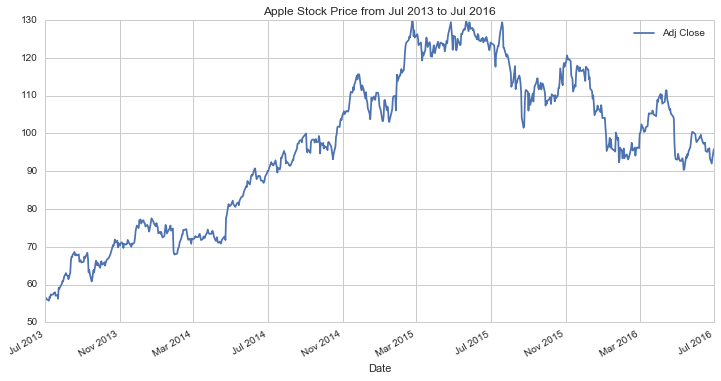

In [5]:
# adjusted close price of apple stock over the past 3 years
apple['Adj Close'].plot(legend = True, figsize = (12, 6))
plt.title('Apple Stock Price from Jul 2013 to Jul 2016')

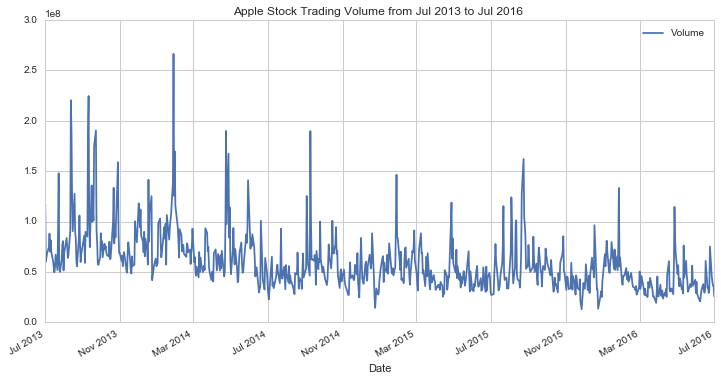

In [6]:
# trading volume of apple stock over the past 3 years
apple['Volume'].plot(legend = True, figsize = (12, 6))
plt.title('Apple Stock Trading Volume from Jul 2013 to Jul 2016 ')

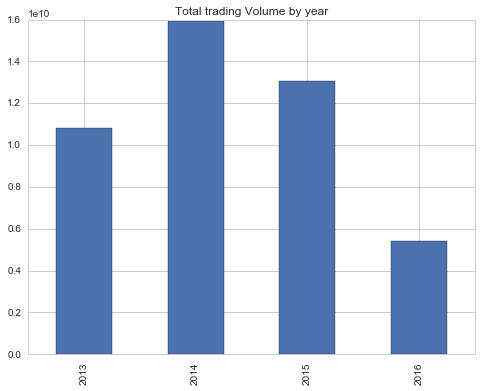

In [16]:
# Trading volume by year
mpl.rcParams['figure.figsize'] = (8, 6)
g = apple.groupby(apple.index.year)['Volume'].sum()
g.plot(kind = 'bar')
plt.title('Total trading Volume by year')

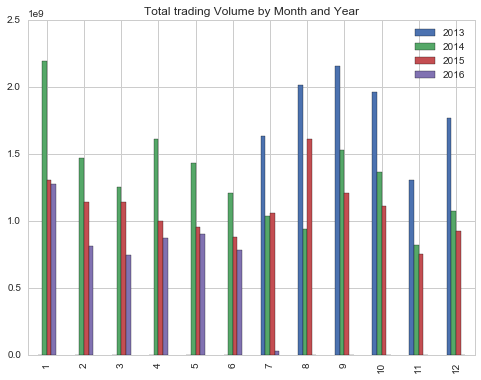

In [22]:
# Trading volume by month and year
g2 = apple.groupby([apple.index.month, apple.index.year])['Volume'].sum().unstack()
g2.plot(kind = 'bar')
plt.title('Total trading Volume by Month and Year')

In [24]:
# how about just for the past year
apple2 = apple.loc[apple.index >= '2015-07-01']
apple2.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-07-01,126.900002,126.940002,125.989998,126.599998,30238800,124.059746
2015-07-02,126.430000,126.690002,125.769997,126.440002,27211000,123.902960
2015-07-06,124.940002,126.230003,124.849998,126.000000,28060400,123.471786
2015-07-07,125.889999,126.150002,123.769997,125.690002,46946800,123.168009
2015-07-08,124.480003,124.639999,122.540001,122.570000,60761600,120.110610


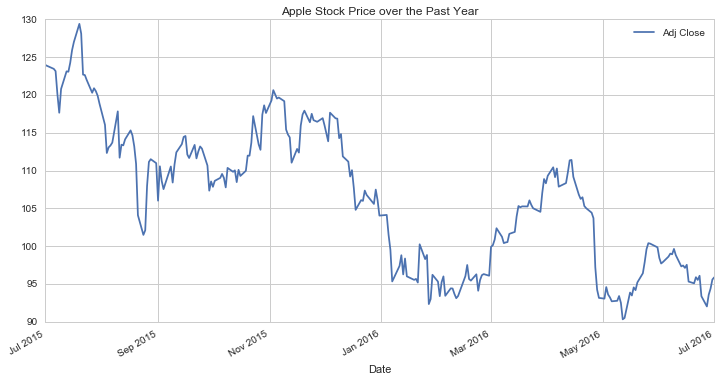

In [25]:
# adjusted close price over the past year
apple2['Adj Close'].plot(legend = True, figsize = (12, 6))
plt.title('Apple Stock Price over the Past Year')

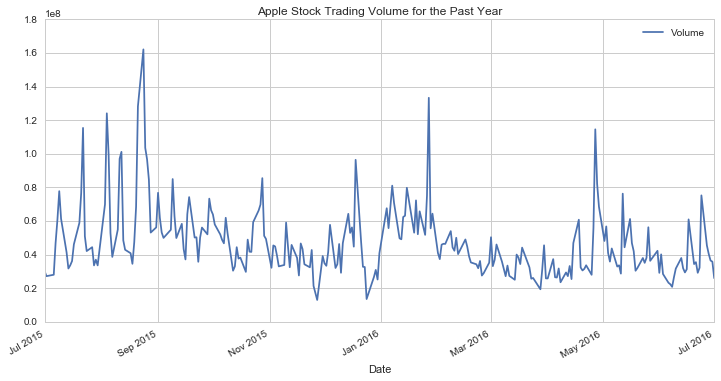

In [26]:
# volume over the past years
apple2['Volume'].plot(legend = True, figsize = (12, 6))
plt.title('Apple Stock Trading Volume for the Past Year')

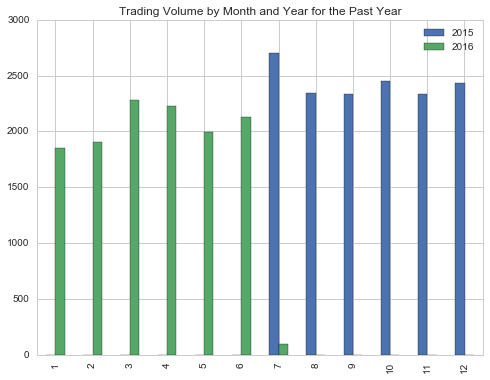

In [27]:
# volume by month and month
g3 = apple2.groupby(by = [apple2.index.month, apple2.index.year])['Adj Close'].sum().unstack()
g3.plot(kind = 'bar')
plt.title('Trading Volume by Month and Year for the Past Year')

#### Moving average

In [28]:
# MA over different days
d = [30, 50, 100]

for days in d:
    column_name = 'MA {}' .format(str(days))
    apple[column_name] = apple['Adj Close'].rolling(window = days, center = False).mean()

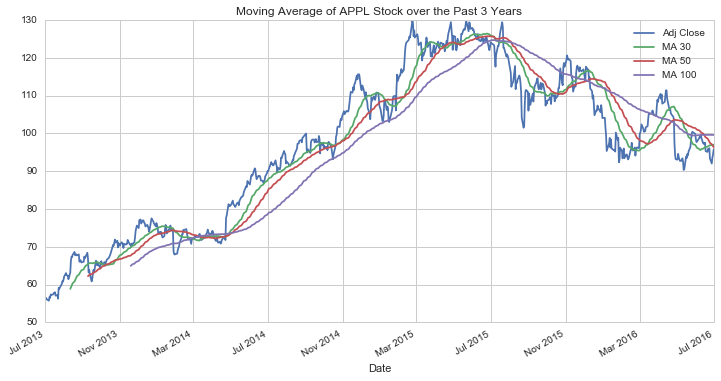

In [29]:
apple[['Adj Close', 'MA 30', 'MA 50', 'MA 100']].plot(subplots = False, figsize = (12, 6))
plt.title('Moving Average of APPL Stock over the Past 3 Years')

In [30]:
# MA over different days for the past year
d2 = [7, 30, 50]

for days2 in d2:
    column_name2 = 'MA {}' .format(str(days2))
    apple2[column_name2] = apple2['Adj Close'].rolling(window = days2, center = False).mean()

C:\Users\yanfeiwu\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


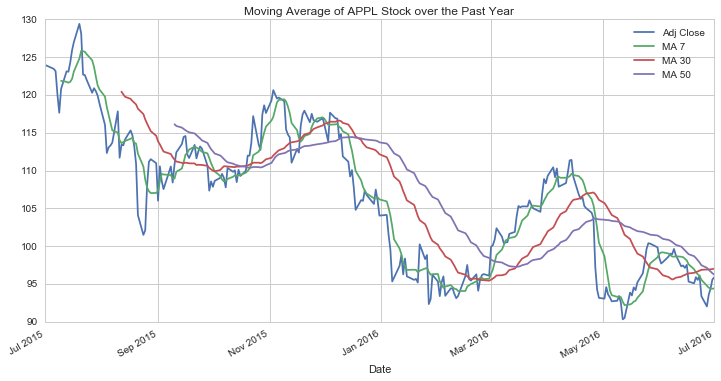

In [31]:
apple2[['Adj Close', 'MA 7', 'MA 30', 'MA 50']].plot(subplots = False, figsize = (12, 6))
plt.title('Moving Average of APPL Stock over the Past Year')

A crossover occurs when a faster moving average (green) crosses a slower moving average (purple). In other words, this is when the shorter period moving average line crosses a longer period moving average line. In stock investing, this meeting point is used either to enter (buy or sell) or exit (sell or buy) the market.

#### Daily return

In [32]:
apple['Daily Return'] = apple['Adj Close'].pct_change()

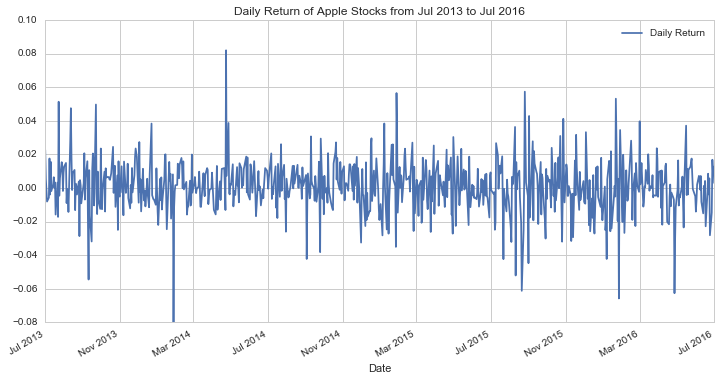

In [33]:
apple['Daily Return'].plot(legend = True, figsize = (12, 6))
plt.title('Daily Return of Apple Stocks from Jul 2013 to Jul 2016')

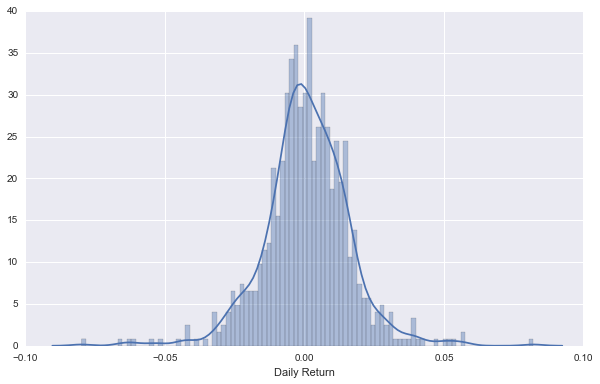

In [34]:
# daily return
sns.set(rc={"figure.figsize": (10, 6)})
sns.distplot(apple['Daily Return'].dropna(), bins = 100)

In [35]:
apple2['Daily Return'] = apple2['Adj Close'].pct_change()

C:\Users\yanfeiwu\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


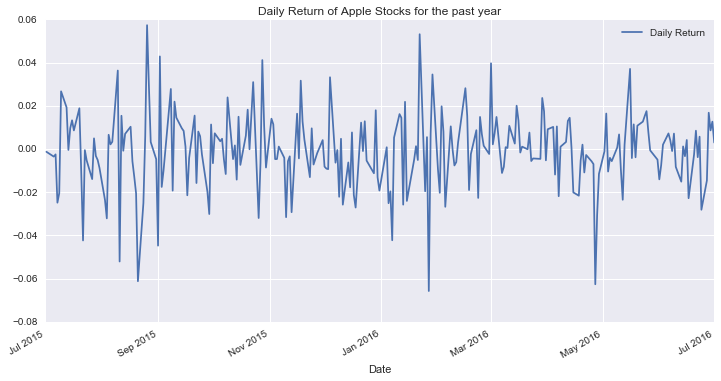

In [36]:
apple2['Daily Return'].plot(legend = True, figsize = (12, 6))
plt.title('Daily Return of Apple Stocks for the past year')

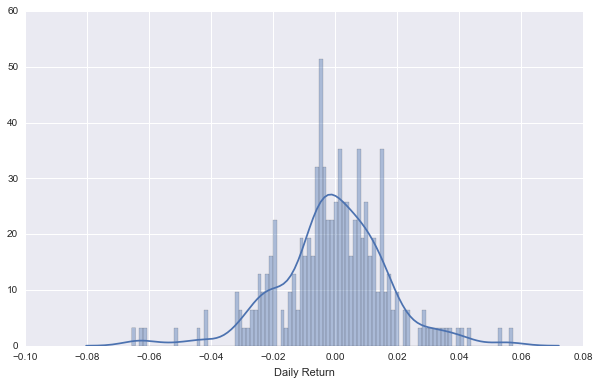

In [37]:
sns.set(rc={"figure.figsize": (10, 6)})
sns.distplot(apple2['Daily Return'].dropna(), bins = 100)

#### Correlation between stocks

In [38]:
# the closing price of different stocks
closing = web.DataReader(['AAPL', 'GOOG', 'MSFT', 'FB', 'INTC'], 'yahoo', start, end)['Adj Close']
closing.head()

,AAPL,FB,GOOG,INTC,MSFT
Date,,,,,
2013-07-01,54.967257,24.809999,443.497273,21.675532,31.636689
2013-07-02,56.212424,24.410000,440.715053,21.521290,31.249975
2013-07-03,56.522706,24.520000,442.772999,21.557583,31.314427
2013-07-05,56.068698,24.370001,446.299475,21.829774,31.498576
2013-07-08,55.750356,24.709999,452.093670,21.040419,31.609068


In [39]:
closing.describe()

,AAPL,FB,GOOG,INTC,MSFT
count,758.000000,758.000000,758.000000,758.000000,758.000000
mean,96.502753,78.125185,586.375962,28.652731,42.537775
std,20.076763,22.726790,89.641270,4.441837,7.119282
min,54.967257,24.370001,423.027710,20.073578,28.883210
25%,75.679657,62.432500,530.464900,24.427083,37.323616
50%,97.715842,77.535000,564.334492,29.905000,42.960605
75%,112.254008,94.970001,651.632477,32.170375,46.636501
max,129.880553,120.500000,776.599976,35.940155,56.067840


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000001080D240>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x00000000110A8BE0>], dtype=object)

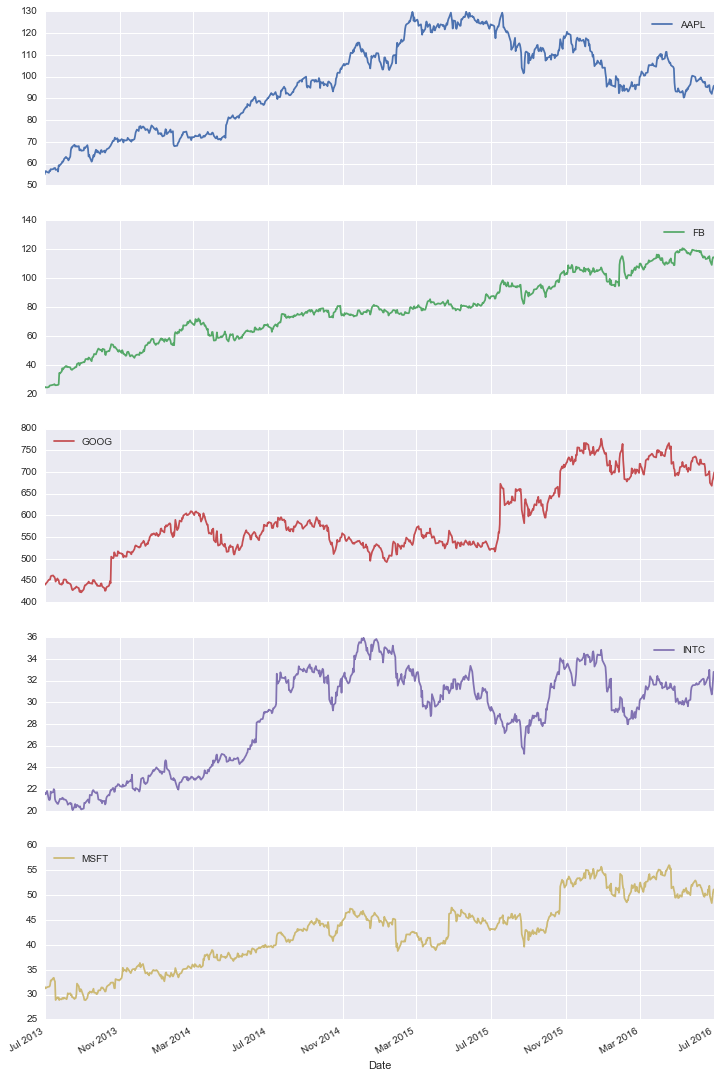

In [40]:
closing.plot(subplots = True, legend = True, figsize = (12, 20))

In [41]:
# daily returns of these stocks
retn = closing.pct_change().dropna()
retn.head()

,AAPL,FB,GOOG,INTC,MSFT
Date,,,,,
2013-07-02,0.022653,-0.016122,-0.006273,-0.007116,-0.012224
2013-07-03,0.005520,0.004506,0.004670,0.001686,0.002062
2013-07-05,-0.008032,-0.006117,0.007965,0.012626,0.005881
2013-07-08,-0.005678,0.013951,0.012983,-0.036160,0.003508
2013-07-09,0.017588,0.031162,0.000166,-0.002156,0.000582


In [42]:
retn.describe()

,AAPL,FB,GOOG,INTC,MSFT
count,757.000000,757.000000,757.000000,757.000000,757.000000
mean,0.000856,0.002278,0.000723,0.000651,0.000763
std,0.015560,0.023304,0.015798,0.014522,0.015995
min,-0.079927,-0.069348,-0.053179,-0.091020,-0.113995
25%,-0.006928,-0.009696,-0.007053,-0.007564,-0.007080
50%,0.000905,0.001286,-0.000018,0.000801,0.000411
75%,0.009740,0.012689,0.008547,0.008117,0.008466
max,0.081982,0.296115,0.160524,0.092715,0.104522


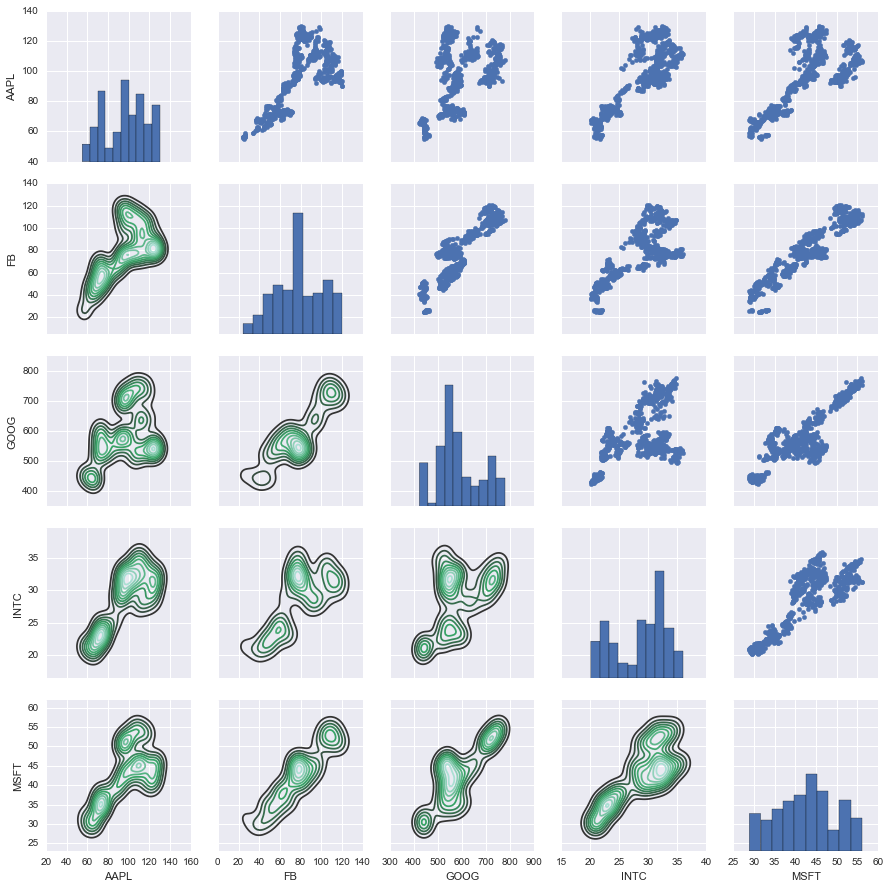

In [43]:
# correlation of closing prices
f = sns.PairGrid(closing)
f.map_upper(plt.scatter)
f.map_lower(sns.kdeplot)
f.map_diag(plt.hist)

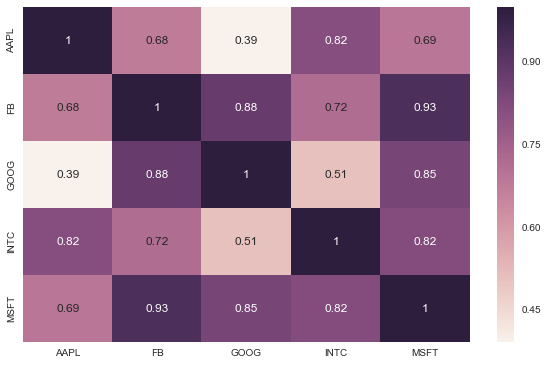

In [44]:
# the correlation coefficient
sns.heatmap(closing.corr(), annot = True)

Closing price of most of these stocks show strong to moderate correlation with each other, except for that between Google and apple.

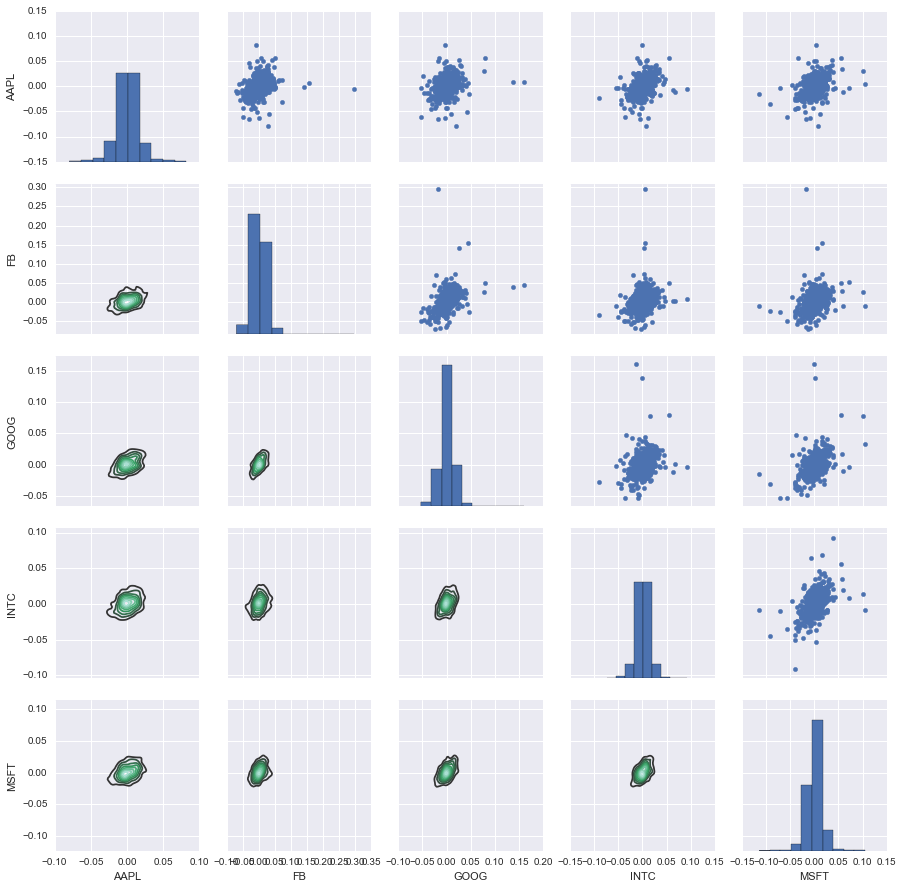

In [45]:
# correlation of daily returns
f2 = sns.PairGrid(retn)
f2.map_upper(plt.scatter)
f2.map_lower(sns.kdeplot)
f2.map_diag(plt.hist)

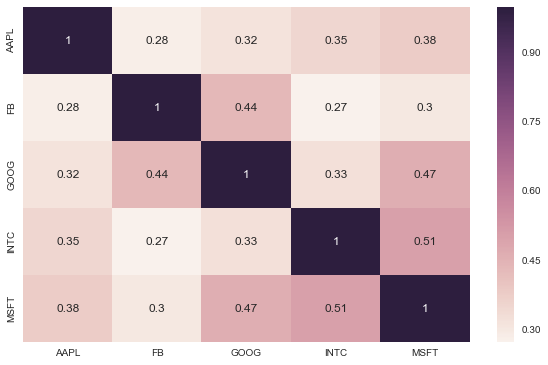

In [46]:
# correlation coefficient
sns.heatmap(retn.corr(), annot = True)

The daily return of different stocks seem much less correlated compared to their closing prices.

#### Risk analysis

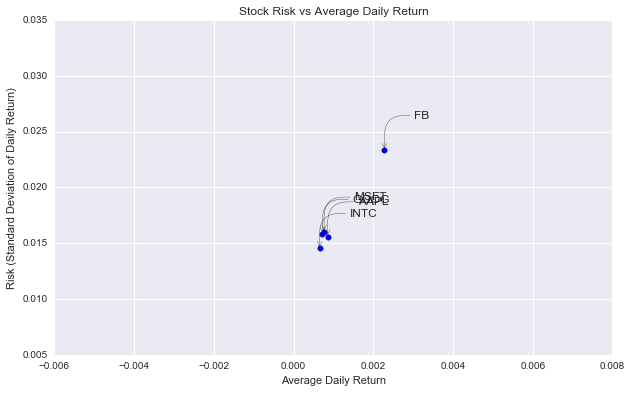

In [50]:
# stock volatility vs average daily return
plt.scatter(retn.mean(), retn.std(), s = 30)
plt.xlabel('Average Daily Return')
plt.ylabel('Risk (Standard Deviation of Daily Return)')
plt.title('Stock Risk vs Average Daily Return')

for label, x, y in zip(retn.columns, retn.mean(), retn.std()):
    plt.annotate(label, xy = (x, y), xytext = (30, 30),
                textcoords = 'offset points', ha = 'left', va = 'bottom',
                arrowprops = dict(arrowstyle = '->', 
                                  connectionstyle = 'angle, angleA = 0, angleB = 90, rad=20'))

FB stock shows the largest average daily return but is also the most risky.

#### Monte Carlo prediction

In [51]:
apple.tail()

,Open,High,Low,Close,Volume,Adj Close,MA 30,MA 50,MA 100,Daily Return
Date,,,,,,,,,,
2016-06-27,93.000000,93.050003,91.500000,92.040001,45489600,92.040001,96.934000,97.152406,99.606309,-0.014561
2016-06-28,92.900002,93.660004,92.139999,93.589996,40444900,93.589996,96.924333,96.887614,99.582055,0.016840
2016-06-29,93.970001,94.550003,93.629997,94.400002,36531000,94.400002,96.954667,96.650354,99.591545,0.008655
2016-06-30,94.440002,95.769997,94.300003,95.599998,35836400,95.599998,96.989334,96.432720,99.603194,0.012712
2016-07-01,95.489998,96.470001,95.330002,95.889999,26026500,95.889999,97.045667,96.243946,99.617943,0.003033


In [52]:
days = 365
dt = 1/days
mu = retn.mean()['AAPL']
sigma = retn.std()['AAPL']

In [53]:
def monte_carlo_apple(start_price, days, mu, sigma):
    price = np.zeros(days)
    price[0] = start_price
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for i in range(1, days):
        shock[i] = np.random.normal(loc = mu*dt, scale = sigma*np.sqrt(dt))
        drift[i] = mu*dt
        price[i] = price[i - 1] + price[i - 1] * (drift[i] + shock[i])
    return price

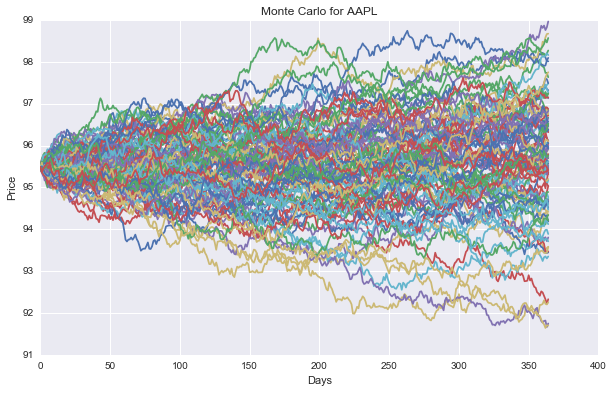

In [54]:
start_price = 95.489998

for run in range(1, 100):
    plt.plot(monte_carlo_apple(start_price, days, mu, sigma))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo for AAPL')

In [55]:
runs = 10000
simulation = np.zeros(runs)

for i in range(runs):
    simulation[i] = monte_carlo_apple(start_price, days, mu, sigma)[days - 1]

In [56]:
q = np.percentile(simulation, 5) #define quantile

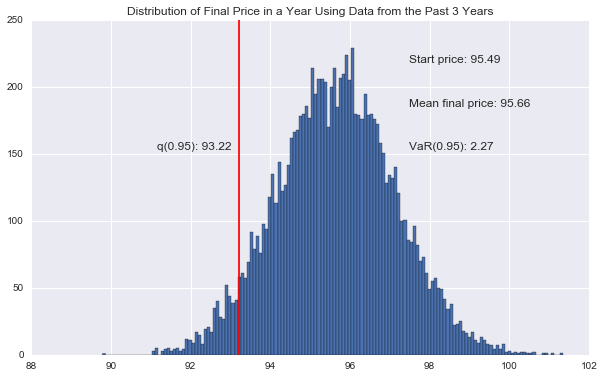

In [58]:
plt.hist(simulation, bins = 150)
plt.figtext(0.65, 0.8, 'Start price: %.2f' %start_price)
plt.figtext(0.65, 0.7, 'Mean final price: %.2f' %simulation.mean())
plt.figtext(0.65, 0.6, 'VaR(0.95): %.2f' %(start_price - q))
plt.figtext(0.3, 0.6, 'q(0.95): %.2f' %q)
plt.axvline(x = q, color='r')       
plt.title('Distribution of Final Price in a Year Using Data from the Past 3 Years')

In [59]:
# use data for the past year
mu2 = apple2['Daily Return'].dropna().mean()
sigma2 = apple2['Daily Return'].dropna().std()

In [60]:
def monte_carlo_apple2(start_price, days, mu2, sigma2):
    price2 = np.zeros(days)
    price2[0] = start_price
    shock2 = np.zeros(days)
    drift2 = np.zeros(days)
    
    for i in range(1, days):
        shock2[i] = np.random.normal(loc = mu2*dt, scale = sigma2*np.sqrt(dt))
        drift2[i] = mu2*dt
        price2[i] = price2[i - 1] + price2[i - 1] * (drift2[i] + shock2[i])
    return price2

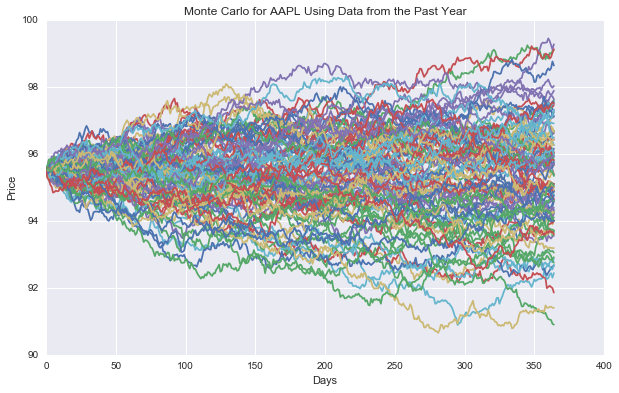

In [61]:
for run in range(1, 100):
    plt.plot(monte_carlo_apple2(start_price, days, mu2, sigma2))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo for AAPL Using Data from the Past Year')

In [62]:
runs2 = 10000
simulation2 = np.zeros(runs2)

for i in range(runs2):
    simulation2[i] = monte_carlo_apple2(start_price, days, mu2, sigma2)[days - 1]

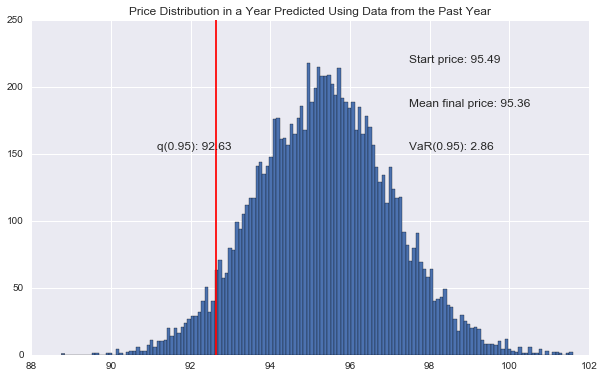

In [63]:
q2 = np.percentile(simulation2, 5)

plt.hist(simulation2, bins = 150)
plt.figtext(0.65, 0.8, 'Start price: %.2f' %start_price)
plt.figtext(0.65, 0.7, 'Mean final price: %.2f' %simulation2.mean())
plt.figtext(0.65, 0.6, 'VaR(0.95): %.2f' %(start_price - q2))
plt.figtext(0.3, 0.6, 'q(0.95): %.2f' %q2)
plt.axvline(x = q2, color='r')       
plt.title('Price Distribution in a Year Predicted Using Data from the Past Year')

The predicted risk is slightly larger then that using 3-year data. But overall, it is a stable stock.

In [64]:
# FB stock
mu_FB = retn.mean()['FB']
sigma_FB = retn.std()['FB']

def monte_carlo_FB(start_price_FB, days, mu_FB, sigma_FB):
    price_FB = np.zeros(days)
    price_FB[0] = start_price_FB
    shock_FB = np.zeros(days)
    drift_FB = np.zeros(days)
    
    for i in range(1, days):
        shock_FB[i] = np.random.normal(loc = mu_FB*dt, scale = sigma_FB*np.sqrt(dt))
        drift_FB[i] = mu_FB*dt
        price_FB[i] = price_FB[i - 1] + price_FB[i - 1] * (drift_FB[i] + shock_FB[i])
    return price_FB

In [66]:
facebook = web.DataReader("FB", 'yahoo', start, end)
facebook.tail()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-06-27,111.570000,111.570000,108.230003,108.970001,36130400,108.970001
2016-06-28,110.629997,112.750000,110.550003,112.699997,26813800,112.699997
2016-06-29,113.370003,114.250000,113.040001,114.160004,20968300,114.160004
2016-06-30,114.669998,115.180000,113.669998,114.279999,23192700,114.279999
2016-07-01,114.199997,115.129997,113.809998,114.190002,14980000,114.190002


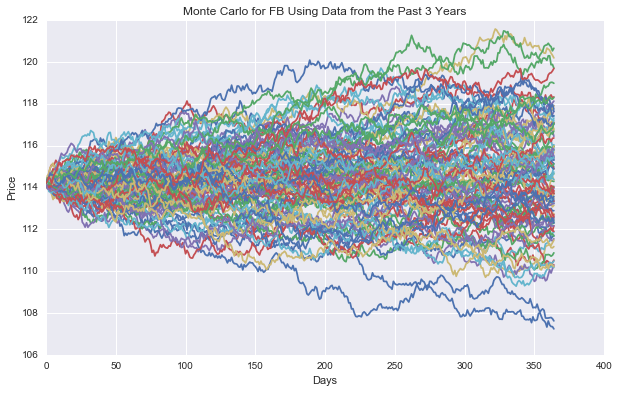

In [67]:
start_price_FB = 114.199997

for run in range(1, 100):
    plt.plot(monte_carlo_FB(start_price_FB, days, mu_FB, sigma_FB))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo for FB Using Data from the Past 3 Years')

In [68]:
runs_FB = 10000
simulation_FB = np.zeros(runs2)

for i in range(runs_FB):
    simulation_FB[i] = monte_carlo_FB(start_price_FB, days, mu_FB, sigma_FB)[days - 1]

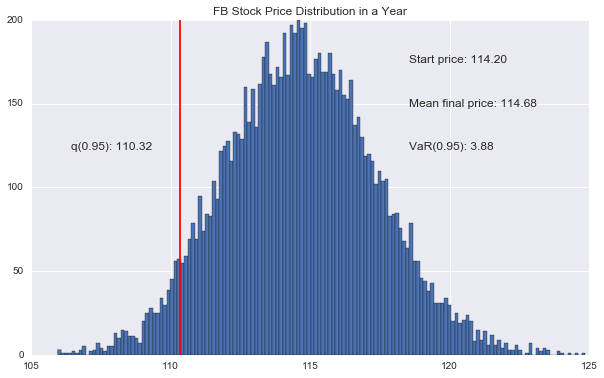

In [71]:
q_FB = np.percentile(simulation_FB, 5)

plt.hist(simulation_FB, bins = 150)
plt.figtext(0.65, 0.8, 'Start price: %.2f' %start_price_FB)
plt.figtext(0.65, 0.7, 'Mean final price: %.2f' %simulation_FB.mean())
plt.figtext(0.65, 0.6, 'VaR(0.95): %.2f' %(start_price_FB - q_FB))
plt.figtext(0.18, 0.6, 'q(0.95): %.2f' %q_FB)
plt.axvline(x = q_FB, color='r')       
plt.title('FB Stock Price Distribution in a Year')

The facebook stock is also quite stable

In [100]:
# unstable tech stock? Westen Digital?

s = datetime.strptime('7/15/2015', '%m/%d/%Y')
e = datetime.strptime('7/15/2016', '%m/%d/%Y')
wd = web.DataReader('WDC', 'yahoo', s, e)
wd.tail()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-07-11,49.500000,50.490002,48.750000,49.480000,5546200,49.480000
2016-07-12,51.680000,52.549999,50.750000,51.840000,8048800,51.840000
2016-07-13,51.919998,52.430000,51.240002,52.009998,4005300,52.009998
2016-07-14,52.849998,52.849998,51.650002,51.750000,3621900,51.750000
2016-07-15,52.040001,52.090000,51.029999,51.660000,3136300,51.660000


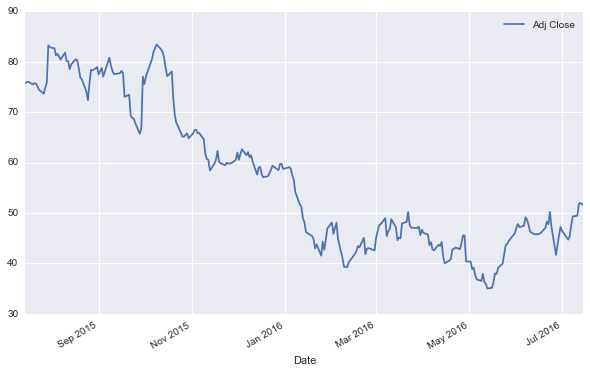

In [101]:
wd['Adj Close'].plot(legend = True)

In [102]:
wd['Daily Return'] = wd['Adj Close'].pct_change()

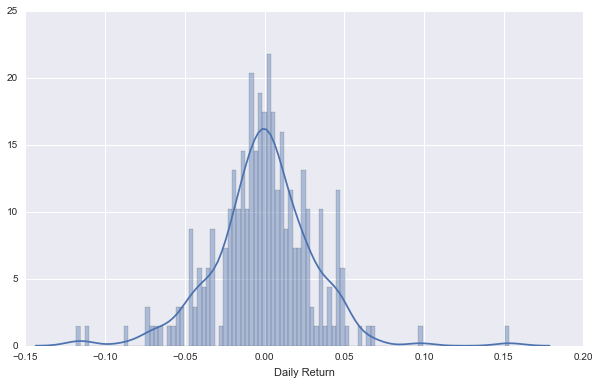

In [103]:
sns.set(rc={"figure.figsize": (10, 6)})
sns.distplot(wd['Daily Return'].dropna(), bins = 100)

In [104]:
mu_WD = wd['Daily Return'].dropna().mean()
sigma_WD = wd['Daily Return'].dropna().std()

def monte_carlo_WD(start_price_WD, days, mu_WD, sigma_WD):
    price_WD = np.zeros(days)
    price_WD[0] = start_price_WD
    shock_WD = np.zeros(days)
    drift_WD = np.zeros(days)
    
    for i in range(1, days):
        shock_WD[i] = np.random.normal(loc = mu_WD*dt, scale = sigma_WD*np.sqrt(dt))
        drift_WD[i] = mu_WD*dt
        price_WD[i] = price_WD[i - 1] + price_WD[i - 1] * (drift_WD[i] + shock_WD[i])
    return price_WD

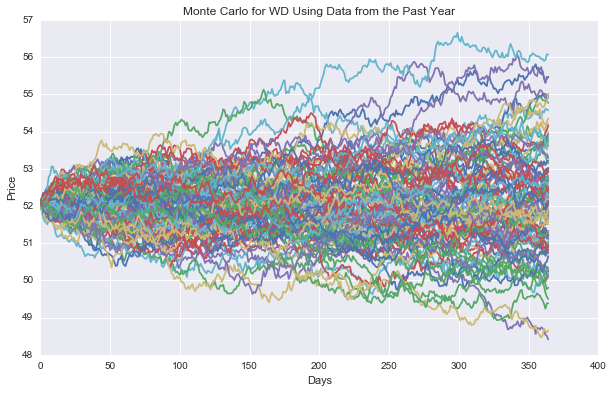

In [105]:
start_price_WD = 52.040001

for run in range(1, 100):
    plt.plot(monte_carlo_WD(start_price_WD, days, mu_WD, sigma_WD))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo for WD Using Data from the Past Year')

In [106]:
runs_WD = 10000
simulation_WD = np.zeros(runs_WD)

for i in range(runs_WD):
    simulation_WD[i] = monte_carlo_WD(start_price_WD, days, mu_WD, sigma_WD)[days - 1]

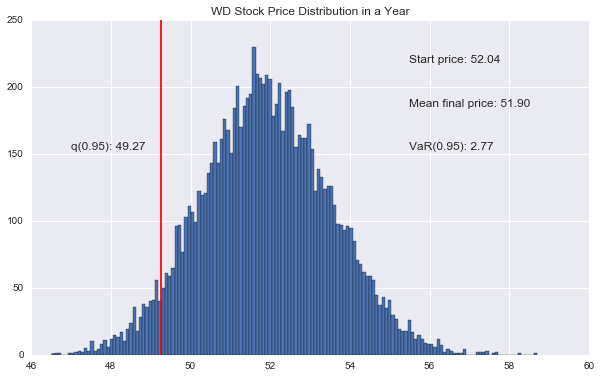

In [107]:
q_WD = np.percentile(simulation_WD, 5)

plt.hist(simulation_WD, bins = 150)
plt.figtext(0.65, 0.8, 'Start price: %.2f' %start_price_WD)
plt.figtext(0.65, 0.7, 'Mean final price: %.2f' %simulation_WD.mean())
plt.figtext(0.65, 0.6, 'VaR(0.95): %.2f' %(start_price_WD - q_WD))
plt.figtext(0.18, 0.6, 'q(0.95): %.2f' %q_WD)
plt.axvline(x = q_WD, color='r')       
plt.title('WD Stock Price Distribution in a Year')